In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report

c:\Users\Cr0l3y\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
dados = pd.read_csv("emp_automovel.csv")
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


Baes de dados ja tratada

- variavel explicativa X
- variael algo y





In [3]:
x= dados.drop("inadimplente", axis=1)
y= dados["inadimplente"]

Usandoa arvore de decisão

In [4]:
modelo = DecisionTreeClassifier()
modelo.fit(x,y)
modelo.score(x,y)

1.0

In [5]:
x, x_teste, y,y_teste= train_test_split(x,y, test_size=0.15,stratify=y, random_state= 5)
x_train, x_val, y_train, y_val = train_test_split(x,y, stratify= y, random_state=5)

In [6]:
modelo =DecisionTreeClassifier()
modelo.fit(x_train,y_train)
print(f'Acurácia de treino: {modelo.score(x_train, y_train)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 1.0
Acurácia de validação: 0.8475742531138403


In [7]:
modelo =DecisionTreeClassifier(max_depth=10)
modelo.fit(x_train,y_train)
print(f'Acurácia de treino: {modelo.score(x_train, y_train)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9205865272938444
Acurácia de validação: 0.9060186394913335


In [9]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10360   119]
 [  960    42]]


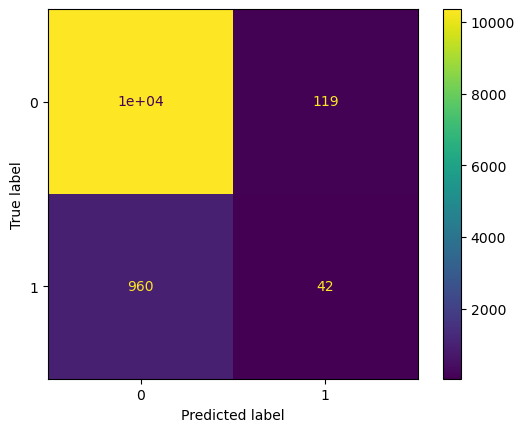

In [10]:
view = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao)
view.plot();

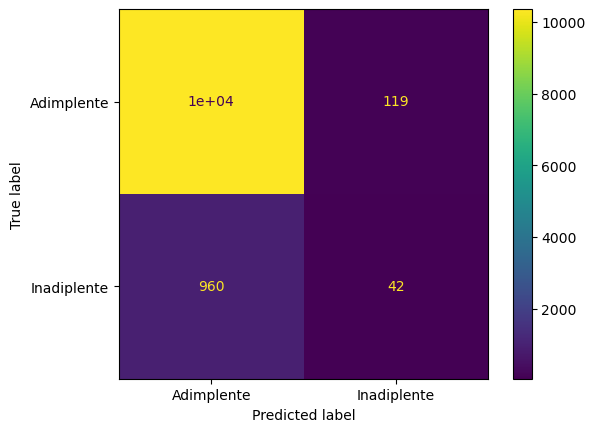

In [11]:
view = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao, display_labels=["Adimplente","Inadiplente"])
view.plot();

# RandomForestClassifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(max_depth = 10)
modelo.fit(x_train, y_train)
print(f'Acurácia de treino: {modelo.score(x_train, y_train)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.915650406504065
Acurácia de validação: 0.9129866736347008


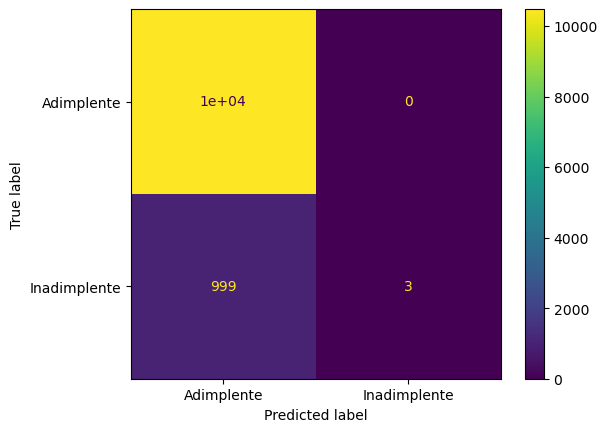

In [15]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao,
                                      display_labels = ['Adimplente', 'Inadimplente'])
visualizacao.plot();

In [12]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9060186394913335


In [13]:
from sklearn.metrics import precision_score, recall_score
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall: {recall_score(y_val, y_previsto)}')

Precisão: 0.2608695652173913
Recall: 0.041916167664670656


In [14]:
from sklearn.metrics import f1_score
print(f'F1-score: {f1_score(y_val, y_previsto)}')

F1-score: 0.07222699914015478


# Curva ROC

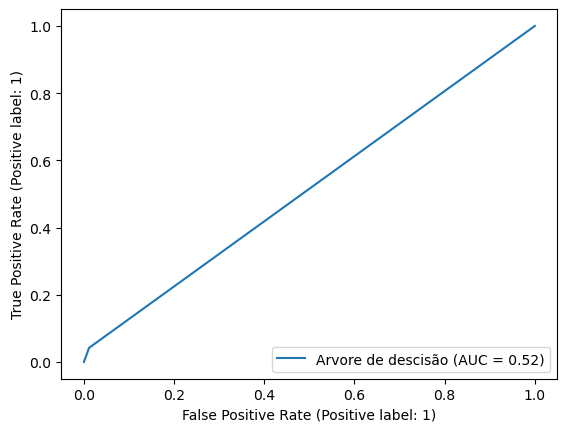

In [15]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name="Arvore de descisão");

In [16]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5152800611202445


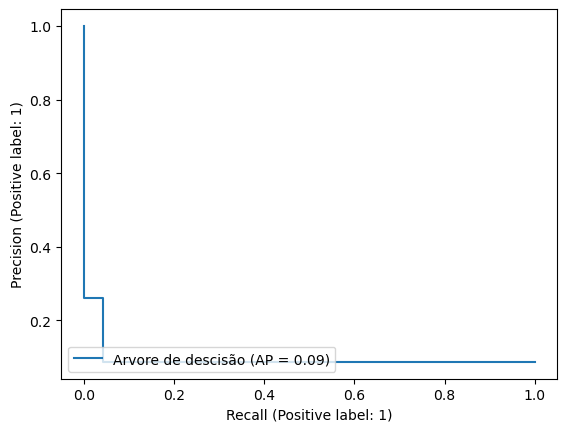

In [17]:
PrecisionRecallDisplay.from_predictions(y_val,y_previsto, name="Arvore de descisão");

In [18]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.09455106215466953


In [19]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481

